<a href="https://colab.research.google.com/github/isabellacadisco/Algorithms-for-Massive-Data-course/blob/main/prova_installazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 414.8 kB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=0a8a4945a7151ef50b5e0e5eb04f14260445d4631d5830640596608aadab1e56
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pyspark
import findspark
import numpy as np
import pandas as pd
import csv
import re
import string
import random

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

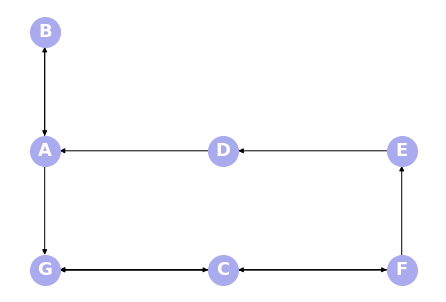

In [5]:
np.set_printoptions(precision=3)
np.array([.12333122, .13432221, .64442143])
labels = ['A', 'B', 'C', 'D',  'E', 'F', 'G']

pages = range(len(labels))

# this dictionary assiciates number in pages to labels
page_labels = {p: l for p, l in zip(pages, labels)}
page_labels

links = [(1, 0), (3, 0),
         (0, 1), (5, 2),
         (6, 2), (6, 5),
         (5, 6), (2, 6),
         (0, 6), (5, 4), (4, 3)]

import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()

for p in pages:
    g.add_node(p)

for (a, b) in links:
    g.add_edge(pages[a], pages[b])


opts = {'node_size': 900, 
        'font_color': 'w',
        'font_size': 18,
        'font_weight': 'bold'}

pos = {0: (0, 1), 1: (0, 2), 2: (1, 0),
       3: (1, 1), 4: (2, 1), 5: (2, 0), 6: (0, 0)}

nx.draw(g, with_labels=True, labels=page_labels,
        pos=pos, node_color='#AAAAEE', **opts)
plt.show()

In [6]:
adjacency = {}
for u in range(len(pages)):
    adjacency[u] = []
    
for (a, b) in links:
    adjacency[a].append(b)

print(adjacency)


connection_matrix = []
for a in adjacency:
    for b in adjacency[a]:
        # this builds the transition matrix (beware of indices!)
        connection_matrix.append((b, a, 1./len(adjacency[a])))
connection_matrix

{0: [1, 6], 1: [0], 2: [6], 3: [0], 4: [3], 5: [2, 6, 4], 6: [2, 5]}


[(1, 0, 0.5),
 (6, 0, 0.5),
 (0, 1, 1.0),
 (6, 2, 1.0),
 (0, 3, 1.0),
 (3, 4, 1.0),
 (2, 5, 0.3333333333333333),
 (6, 5, 0.3333333333333333),
 (4, 5, 0.3333333333333333),
 (2, 6, 0.5),
 (5, 6, 0.5)]

In [7]:
links_RDD = sc.parallelize(connection_matrix).cache()

In [8]:
n = len(pages)
page_rank = np.ones(n)/n
old_page_rank = np.ones(n)